# Circuitos

### Ejemplos
<section class="post-meta">
por Carlos Ruestes y Cristián Sánchez
</section>
Última edición: 01 de Septiembre de 2019

### Circuitos RC y RL 

Los circuitos RC y RL son unos de los ejemplos básicos de los circuitos eléctricos. Aún así, son muy ricos en contenidos. Vamos a examinarlos en profundidad.

### Circuito RL

Los componentes usados en un circuito RL son una fuente de corriente continua (V1), una resistencia (R1) y una inductancia (L1). En el esquema del circuito, la inductancia se utiliza para representar una característica física del circuito. En cierta forma, la inductancia representa una ‘inercia eléctrica’ del circuito. Esta es la razón por la cual la corriente del circuito no salta inmediatamente al valor V/R dado por la ley de Ohm. Eventualmente, la corriente alcanzará el valor V/R luego de un tiempo infinito, pero por razones prácticas, podemos considerar que alcanza ese valor luego de transcurrido determinado tiempo (por ejemplo 4 veces tau = L/R debería ser suficiente).

![circuit2](images_RLC/RL.jpg)

Lo que podemos esperar es que la corriente obedecerá la siguiente ecuación diferencial dada por la ley de Ohm: 

$$
V_1-L_1\frac{dI(t)}{dt} = R_1 I(t)
$$

cuya solución exacta es

$$
I(t)=\frac{V_1}{R_1}(1-e^{-\frac{R_1}{L_1}t})
$$

El código a continuación permite modelar este circuito y graficar su comportamiento

Inductancia (H): 	0.0229
Resistencia (Ohm): 	3.34
Tensión CC (V): 	5
Corriente (A): 		1.4970059880239521
Tau: 			0.006856287425149701
Tiempo crítico (s): 	0.03016766467065869


Frec de encendido/apagado (Hz): 	16.57403731639539
Coeficiente w (2*pi*f) 	104.1377477470217


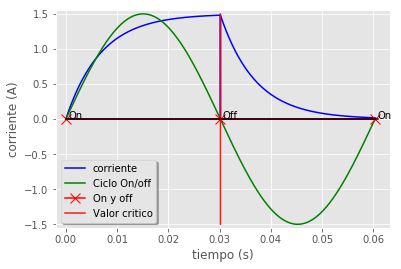

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

l = 0.0229      #Inductancia (H)
r = 3.34        #Resistencia (Ohm)
v = 5           #Tension CC (V)
i = v/r         #Corriente max (A)
tau = l/r       #constante de tiempo Tau
a = tau * 4.4   #tiempo crítico al cual se conecta/desconecta la batería

t = np.linspace(0,2*a,2000) 

#-------------------------------------------------------------------------------
#1er ciclo de encendido

def initialCurrent():
    current = []
    for i in t:
        if i <= a:
            current.append((v/r)*(1-np.exp((-r/l)*i)))          #I(t) = v/r*[1-exp((-r/l)*t)]
        else:
            current.append(0)
    return np.array(current)

#Grafico corriente inicial
Icurrent = initialCurrent()
plt.plot(t,Icurrent,label='corriente',color='blue')

#------------------------------------------------------------------------------
#1er ciclo de apagado

def laterCurrent():
    current = []
    for i in t:
        if i >= a:
            current.append(Icurrent[-1001]*np.exp((-r/l)*(i-a)))  #I(t) = Ir * exp((-r/l)*(t-t0))
        else:
            current.append(0)
    return np.array(current)

#Grafico corriente al apagar
current_off = laterCurrent()
plt.plot(t,current_off,color='blue')


#-------------------------------------------------------------------------------
#Ciclo de encendido y apagado: encendido y apagado en los ceros de la función it
f = 1/(2*a)                 #frequency f = 1/T
w = np.pi/a                 #w = 2pi * f
it = i*np.sin(w*t)
plt.plot(t,it,label='Ciclo On/off',color='green')

#Indicar ceros
zeros = np.array([0,a,2*a])
zeros_i = i*np.sin(w*zeros)
plt.plot(zeros,zeros_i,marker='x',markersize=10,label='On y off',color='red')
plt.annotate('On',xy=(zeros[0]+0.0005,zeros_i[0]))
plt.annotate('Off',xy=(zeros[1]+0.0005,zeros_i[1]))
plt.annotate('On',xy=(zeros[2]+0.0005,zeros_i[2]))

#Grafico de valor critico
plt.plot((a,a+0.00001),(max(it),min(it)),'r',alpha=0.9,label='Valor critico')

#-------------------------------------------------------------------------------
#Imprimir info
print('Inductancia (H):','\t'+str(l))
print('Resistencia (Ohm):','\t'+str(r))
print('Tensión CC (V):','\t'+str(v))
print('Corriente (A):','\t\t'+str(i))
print('Tau:','\t\t\t'+str(tau))
print('Tiempo crítico (s):','\t'+str(a))
print('\n')
print('Frec de encendido/apagado (Hz):','\t'+str(f))
print('Coeficiente w (2*pi*f)','\t'+str(w))

#-------------------------------------------------------------------------------
#Configuracion de grafico

#eje x
plt.plot((0,2*a+0.0005),(0,0),'k',alpha=0.9,markersize=10)

#etiquetas de ejes
plt.xlabel('tiempo (s)')
plt.ylabel('corriente (A)')

#Leyendas y limites
plt.legend(loc=3,fancybox=True,shadow=True)
plt.xlim(-0.002,2*a+0.003)
plt.ylim(min(it)-0.05,max(it)+0.05)

plt.show()

#-------------------------------------------------------------------------------
# Output

# Inductancia (H): 	0.0229
# Resistencia (Ohm): 	3.34
# Tension CC (V): 	5
# Corriente (A): 		1.4970059880239521
# Tau: 			0.006856287425149701
# Tiempo critico (s): 	0.03016766467065869


# Frecuencia de encendido apagado (Hz): 	16.57403731639539
# Coeficiente w (2*pi*f) 	104.1377477470217

#### Ejercicio

Implemente la resolución numérica de la ecuación diferencial del circuito RL utilizando el método numérico de su preferencia. Grafique, comparando con la solución exacta y estime el error cometido.

### Circuito RC

![circuit3](images_RLC/RC.jpg)

Además de una fuente de tensión, el circuito RC se compone de un capacitor y una resistencia, y asumimos que la autoinductancia es despreciable. Cuando cerramos el circuito, la corriente salta al valor V/R y dado que el capacitor se va cargando y se establece un potencial, podemos esperar que la corriente en la resistencia disminuya a medida que transcurre el tiempo. La ecuación diferencial es la siguiente:

$$
V_1-\frac{Q(t)}{C} = R_1 \frac{dQ(t)}{dt} = R_1 I(t)
$$

cuya solución es

$$
Q(t)=C V_1 (1-e^{-\frac{1}{RC}t})
$$

entonces

$$
\frac{dQ}{dt}=I(t)=\frac{V_1}{R_1} e^{-\frac{1}{RC}t}
$$

El código a continuación permite modelar este circuito y graficar su comportamiento

Tau 5.0
Corriente pico (A) 0.0025


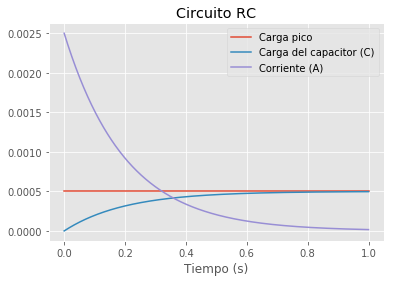

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

c = 100 * 10**(-6)
v = 5
r = 2000

t = np.linspace(0,1,1000)

q = c*v*(1-np.exp((-1/(r*c))*t))
i = (v/r)*np.exp((-1/(r*c))*t)

plt.plot([0,t[-1]],[c*v,c*v],label='Carga pico')
plt.plot(t,q,label='Carga del capacitor (C)')
plt.plot(t,i,label='Corriente (A)')

print('Tau',1/(r*c))
print('Corriente pico (A)',v/r)

plt.xlabel('Tiempo (s)')
plt.title('Circuito RC')
plt.legend()
plt.show()

#### Ejercicio

Implemente la resolución numérica de la ecuación diferencial del circuito RC utilizando el método numérico de su preferencia. Grafique, comparando con la solución exacta y estime el error cometido.

### Red de resistencias

#### Formulación y notación

En este caso, consideraremos una red de resistencias que consiste de N unidades repetidas. Cada unidad tiene dos resistencias de magnitud $R$ and $12R$, respectivamente. Las unidades están conectadas a una batería de $V_0$ voltios.


![circuit1](images_RLC/4ec_image_1.png)

El objetivo de este ejemplo es calcular la corriente total que se propaga a través del circuito. La notación utilizada se puede ver en el siguiente ejemplo. 

![circuit2](images_RLC/4ec_image_2.png)

### Caso especial: $N=1$

Al resolver un problema como este, es a menudo útil explorar casos particulares, de ser posible, antes de intentar resolver el problema general. Vamos a ver dos casos especiales.

Consideremos primero el caso cuando $N=1$. El circuito se ve de la siguiente forma, 

![circuit2](images_RLC/4ec_image_3.png)

Este caso reducido se resuelve fácilmente definiendo $R_{eff}$, la resistencia efectiva (o total) del circuito conectado a la batería. Esto implica que podemos representar al circuito de la siguiente forma,

![circuit2](images_RLC/4ec_image_4.png)

donde $R_{eff} = R+12R=13R$. Luego, por la ley de Ohm,

$$
I_{1,1} = \frac{V_0}{13R} = \frac{1}{13} \frac{\textrm{V}}{\Omega} \approx 0.0769 \textrm{A}
$$

### Caso especial: $N\to\infty$

Como otro caso especial, consideremos la situación en la que el número de unidades $N$ va a infinito. En este caso, la solución no es tan trivial. Obviamente, hay más opciones para que la corriente fluya a medida que $N\to\infty$. Entonces, es de esperar que la resistencia caiga en este límite. 

Nuevamente, podemos considerar una resistencia efectiva $R_{eff}$ y representar todo el circuito como antes. Ahora, tomamos el circuito anterior con infinitas unidades repetidas y agregar una unidad más al mismo, de manera que pueda ser representado por el siguiente diagrama de circuito

![circuit2](images_RLC/4ec_image_5.png)

Dado que $N$ es infinítamente grande, agregar una unidad más no debería cambiar la resistencia efectiva $R_{eff}$ del circuito  en su conjunto. En otras palabras, $12R$ y $R_{eff}$ se encuentran en paralelo en el diagrama anterior y la resistencia total del circuito $R_{total}$ es todavía $R_{eff}$. Con este argumento, podemos relacionar $R_{eff}$ consigo misma

$$
R_{total} = R_{eff} = R + \frac{1}{\frac{1}{12R} + \frac{1}{R_{eff}}}
$$

Resolviendo esta expresión en $R_{eff}$ y exigiendo que $R_{eff}$ sea positiva, obtenemos 

$$
R_{eff} = 4R = 4\Omega
$$

Empleando ley de Ohm,
$$
I_{1,1} = \frac{V_0}{4R} = \frac{1}{4} \frac{\textrm{V}}{\Omega} \approx 0.25 \textrm{A}
$$

### Armando el sistema de ecuaciones

Ahora, regresemos al caso general donde $1<N<\infty$. Para resolverlo, armamos un sistema de $N$ ecuaciones y $N$ incógnitas que estudiaremos como un problema de matrices. Luego lo resolveremos usando Python. Las incógnitas serán las $N$ tensiones $V_i$, $i=1,\ldots,N;$.

Para obtener las $N$ ecuaciones y $N$ incógnitas, primero aplicamos la ley de Ohm a todas las resistencias del circuito. Esto da

$$
I_{i,1} = \frac{V_{i-1} - V_i}{R}, \quad i=1,\ldots,N;
$$

para las $N$ resistencias de valor $R$ y

$$
I_{i,2} = \frac{V_i}{12R}, \quad i=1,\ldots,N;
$$

para las $N$ resistencias de valor 12R.

El siguiente paso es eliminar las corrientes $I_{i,1}$ y $I_{i,2}$ para $i=1,\ldots,N;$ en las ecuaciones arriba. Para hacerlo, recordemos el principio de conservación de la corriente, específicamente, que la suma de las corrientes que ingresan a un nodo es igual a la suma de las corrientes que salen del mismo. (Ver ley de Kirchoff)

Para los nodos $V_i$, donde $i=1,\ldots,N-1;$ tenemos

$$
I_{i,1} = I_{i,2} + I_{i+1,1}
$$

Para el último nodo, denominado $V_N$, tenemos

$$
I_{N,1} = I_{N,2}
$$


Sustituyendo las expresiones anteriores por $I_{i,1}$ y $I_{i,2}$ en cada una de estas últimas dos ecuaciones separadamente, encontramos para el primer nodo $i=1$,

$$
\frac{25}{12R} V_1 - \frac{1}{R}V_2 = V_0
$$

y para los nodos $V_i$, con $i=2,\ldots,N-1;$

$$
-\frac{1}{R}V_{i-1} + \frac{25}{12R}V_i - \frac{1}{R} V_{i+1} = 0
$$

y para la última ecuación,

$$
-\frac{1}{R}V_{N-1} + \frac{13}{12R}V_N = 0
$$

Contando el número de ecuaciones, vemos que estas últimas tres expresiones contienen $N$ ecuaciones en total. Este es exactamente la cantidad necesaria para determinar las tensiones $V_i$ con $i=2,\ldots,N-1;$ unívocamente.

Más aún, estas ecuaciones pueden ser escritas en forma matricial, $\mathcal{A}\boldsymbol{V}=\boldsymbol{b}$

$$
\begin{bmatrix} 25/12R & -1/R  & 0    & \dots & 0 \\ 
                -1/R  & 25/12R & -1/R & \dots & 0 \\
                \vdots& \ddots &\ddots& \ddots& \vdots \\
                0     & \dots &-1/R  & 25/12R & -1/R  \\
                0     & \dots & 0    & -1/R   & 25/12R
\end{bmatrix} \cdot 
\begin{bmatrix} V_1   \\ V_2 \\ \vdots \\ V_{N-1} \\ V_N \end{bmatrix} =
\begin{bmatrix} V_0/R \\ 0   \\ \vdots \\ 0       \\ 0   \end{bmatrix} 
$$

Ahora, encontrar las tensiones incógnita significa resolver la ecuación matricial $\mathcal{A}\boldsymbol{V}=\boldsymbol{b}$, para el vector de tensiones desconocidas $\boldsymbol{V}$. La matriz $\mathcal{A}$ y el vector $\boldsymbol{b}$ están dados por las resistencias en el circuito y la tensión $V_0$. En forma subsecuente, podemos calcular la corriente total mediante la ley de Ohm,

$$
I_{1,1} = \frac{V_0 - V_1}{R}
$$

Lo primero que debemos hacer es definir $V_0$, $R$ y $N$.

In [26]:
R  = 1.0 # Resistencia [Ohm]
V0 = 1.0 # Tension aplicada [V]
N  = 10  # Numero de unidades resistivas [adim.]

Luego, debemos armar la matriz $\mathcal{A}$ y el vector $\boldsymbol{b}$. Comenzamos inicializando ambos en cero antes de llenarlos, y definimos dos variables, $a=25/12R$ y $c=-1/R$ para simplificar el llenado.

In [27]:
# Es importante usar arrays de numpy para asi mejorar
# la eficiencia de las operaciones matriciales
import numpy as np 
import time

A = np.zeros((N,N)) # Matriz de dimension NxN
b = np.zeros(N)     # Vector de longitud N
a = 25.0/(12*R)     # Escalar (constante)
c = -1.0/R          # Escalar (constante)

Luego, armamos $\boldsymbol{b}$, y $\mathcal{A}$ fila por fila.

In [28]:
# el vector b esta compuesto por un primer elemento no nulo y el resto nulo.
b[0] = V0/R

# armamos primera fila de A
A[0,0] = a
A[0,1] = c 

# y armamos ultima fila de A
A[N-1,N-1] = a
A[N-1,N-2] = c

# Armamos el resto de las filas
for row in range(1,N-1): #Noten los indices usados
    A[row,row-1] = c
    A[row,row  ] = a
    A[row,row+1] = c

# Suele ser buena practica imprimir A para ver que se encuentre adecuadamente inicializada
# print(A,b)

Luego podemos resolver el sistema de ecuaciones usando el <i>Numerical Python Linear Algebra Solver</i>

In [29]:
start = time.time()

Voltages = np.linalg.solve(A,b)
print("Tensiones = ", Voltages)

I11 = (V0 - Voltages[0])/R
print("\nI_11     = ", I11)

end = time.time()
print("--- %s segundos ---" %(end - start))

Tensiones =  [0.74895759 0.56032831 0.41839305 0.31132388 0.23019837 0.16825606
 0.12033508 0.08244203 0.05141914 0.02468119]

I_11     =  0.2510424133814533
--- 0.0050127506256103516 segundos ---


Vemos que cuando $N$ se hace grande (incluso con $N\geq15$), $I_{1,1}$ se aproxima al límite que encontramos analíticamente para $N\to\infty$. Esto es $I_{1,1}\to 1/4$.

Debemos notar que, aún cuando el solver usado en este ejemplo es efectivo, es un solver general que  <strong>no</strong> toma ventaja del hecho que $\mathcal{A}$ es una matriz rala o dispersa (sparse, en inglés).

Si $\mathcal{A}$ es realmente grande, este solver se volverá muy lento ya que itera innecesariamente sobre todos los elementos nulos en la matriz. Como alternativa, se puede usar el paquete <i>Scientific Python Sparse Linear Algebra</i>. Sin embargo, este módulo requiere que $\mathcal{A}$ sea almacenada en una forma específica.

In [30]:
from scipy import sparse
import scipy.sparse.linalg as ssl
from scipy.sparse.linalg import spsolve


# Dado que nuestra matriz solo tiene valores no nulos en 
# la DIAGONAL PRINCIPAL, la DIAGONAL SUPERIOR (sup) y la DIAGONAL INFERIOR (sub),
# esto se lo debemos decir a Python .

#Armamos la matriz rala

sup_diag = np.ones(N)*c
sub_diag = np.ones(N)*c
the_diag = np.ones(N)*a

# Offset:           -1     0        1
all_diags  = [sub_diag, the_diag, sup_diag]
offsets    = np.array([-1, 0, 1])


csc="csc" # Formato de computadora para almacenar la matriz

# Ahora si definimos la matriz rala
A_sparse = sparse.spdiags(all_diags, offsets, N,N, format=csc) 
#Busque el significado de esta linea en la documentacion de scipy


#print(A_sparse.todense()) # prints the SPARSE matrix in a DENSE (normal NxN) format.
start = time.time()

Voltages = spsolve(A_sparse,b)
print("Tensiones = ", Voltages)


I11 = (V0 - Voltages[0])/R
print("\nI_11     = ", I11)

end = time.time()
print("--- %s segundos ---" %(end - start))


Tensiones =  [0.74895759 0.56032831 0.41839305 0.31132388 0.23019837 0.16825606
 0.12033508 0.08244203 0.05141914 0.02468119]

I_11     =  0.2510424133814533
--- 0.004573345184326172 segundos ---


Ahora, intenten comparar los tiempos de ejecución de este solver con el estándar, a medidad que se incrementa $N$ a $10, 100, 1000, \ldots$.